In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Professional/FinalProfessionalPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


Average game time

In [3]:
temp_df = df[df["eventType"].isna()]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {}".format(np.mean(match_time)))

The matches have an average time of 25.443348204933265


In [4]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == True)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they win on the red side".format(np.mean(match_time)))

The matches have an average time of 25.166536970134874 when they win on the red side


In [5]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == False)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they lose on the red side".format(np.mean(match_time)))

The matches have an average time of 25.866262819329023 when they lose on the red side


In [6]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == True)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they win on the blue side".format(np.mean(match_time)))

The matches have an average time of 25.069190414507773 when they win on the blue side


In [7]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == False)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they lose on the blue side".format(np.mean(match_time)))

The matches have an average time of 25.904178910519125 when they lose on the blue side


In [8]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]
jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5915,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,5.672050,8286.0,7654.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5938,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,17.020000,10048.0,8002.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5946,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,21.701117,6100.0,11267.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5951,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,23.496983,9475.0,8919.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5958,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,27.062767,11804.0,13243.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275711,KR_6375903925,Red,anonymous 48,kr,Elise,26.279650,1722.0,9788.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275716,KR_6375903925,Red,anonymous 48,kr,Elise,29.629633,3384.0,11610.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275722,KR_6375903925,Red,anonymous 48,kr,Elise,32.611683,6544.0,14078.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


Champions' winrates

In [9]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["victory"] == True)].copy()

In [10]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])
#champs_df.sort_values(by=["victories"], ascending=False)
#print(champs)
    

In [11]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["victory"] == False)].copy()

In [12]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df2 = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df2[0])] = champs[str(champs_df2[0])] + 1
    except:
        champs[str(champs_df2[0])] = 1

champs_df2 = pd.DataFrame.from_dict(champs, orient="index", columns=['defeats'])

champs_winrate = [champs_df, champs_df2]
champs_winrate_df = pd.concat(champs_winrate, axis=1)

champsWinrates = []
for row in champs_winrate_df.iterrows():
    champsWinrates_row = {}
    if(np.isnan(row[1][0])):
        row[1][0] = 0
    if(np.isnan(row[1][1])):
        row[1][1] = 0
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["win rate"] = round(row[1][0]/(row[1][0] + row[1][1]), 2)
    champsWinrates_row["matches"] = row[1][0] + row[1][1]
    champsWinrates_row["image"] = "/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/images/" + str(row[0]) + "_0.jpg"

    champsWinrates.append(champsWinrates_row)

champsWinrates_df = pd.DataFrame(champsWinrates)
#champsWinrates_df = pd.DataFrame(champsWinrates).set_index(["champion"])
champsWinrates_df = champsWinrates_df.sort_values(by=["matches", "win rate"], ascending= False)
champsWinrates_df

,champion,win rate,matches,image
1,LeeSin,0.57,106.0,/home/bambito9/Esports-Data-Analysis/API Reque...
10,Vi,0.52,63.0,/home/bambito9/Esports-Data-Analysis/API Reque...
12,Gragas,0.60,57.0,/home/bambito9/Esports-Data-Analysis/API Reque...
3,Elise,0.60,53.0,/home/bambito9/Esports-Data-Analysis/API Reque...
4,MonkeyKing,0.57,51.0,/home/bambito9/Esports-Data-Analysis/API Reque...
11,Sylas,0.51,51.0,/home/bambito9/Esports-Data-Analysis/API Reque...
2,Nidalee,0.48,50.0,/home/bambito9/Esports-Data-Analysis/API Reque...
9,Kindred,0.52,48.0,/home/bambito9/Esports-Data-Analysis/API Reque...
8,Maokai,0.66,47.0,/home/bambito9/Esports-Data-Analysis/API Reque...
25,Viego,0.55,42.0,/home/bambito9/Esports-Data-Analysis/API Reque...


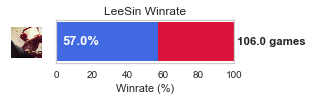

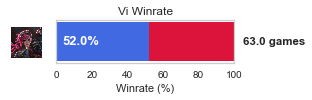

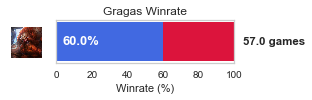

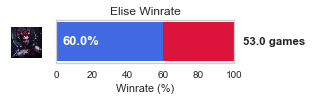

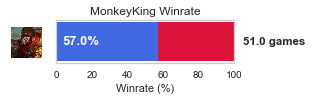

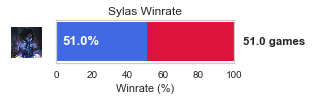

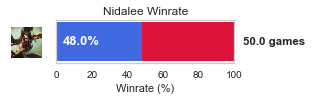

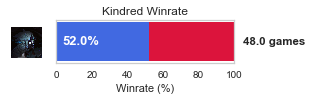

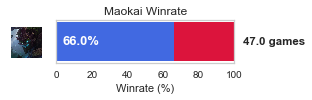

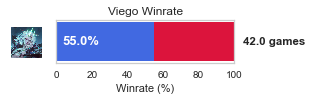

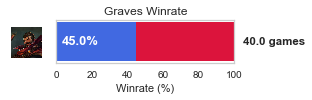

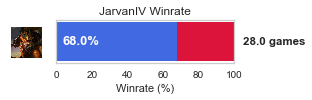

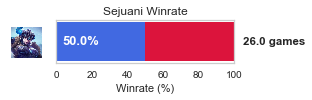

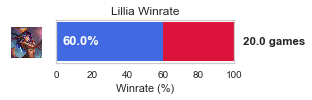

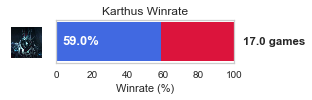

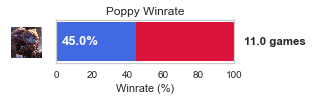

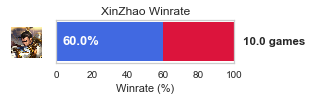

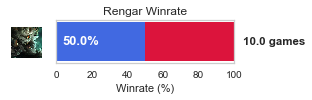

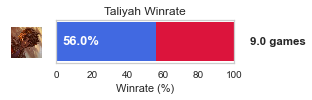

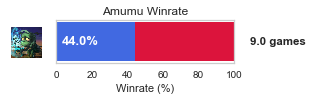

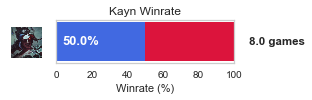

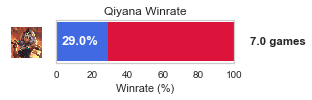

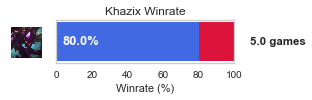

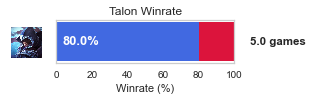

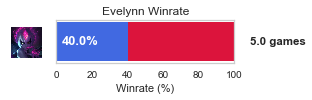

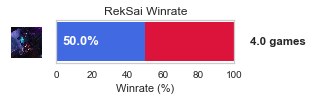

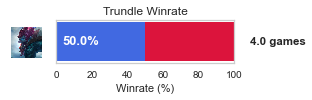

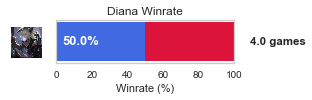

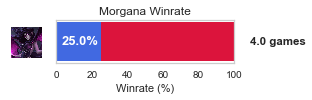

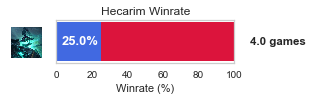

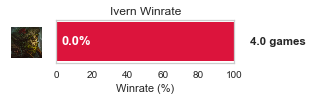

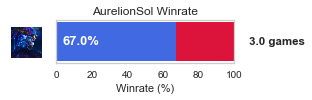

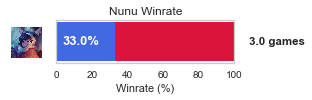

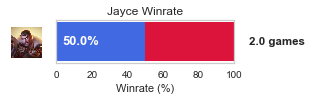

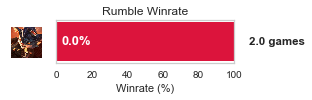

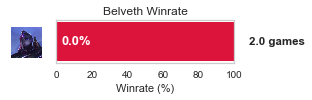

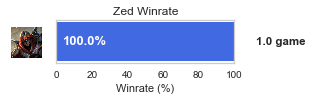

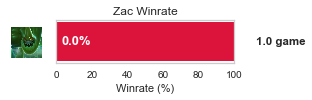

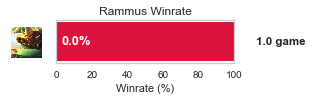

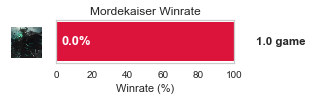

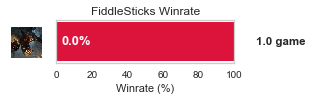

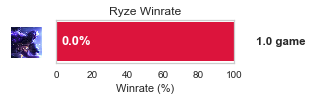

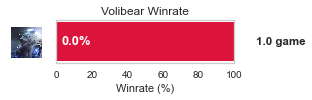

In [13]:
import matplotlib.offsetbox as offsetbox

# Create a separate plot for each champion
for champion_name, winrate, champion_image, games_played in zip(champsWinrates_df["champion"], champsWinrates_df["win rate"], champsWinrates_df["image"], champsWinrates_df["matches"]):
    fig, ax = plt.subplots(figsize=(5, 1.5))

    # Adding the second color until the limit of x-axis (100)
    ax.barh([champion_name], [100], left=[winrate], color="crimson")

    # Plotting the winrate data
    ax.barh([champion_name], [winrate*100], color = "royalblue")


    # Set x-axis limits
    ax.set_xlim(0, 100)

    # Adding champion image to the y-axis tick label
    imagebox = offsetbox.OffsetImage(plt.imread(champion_image), zoom=0.08)  # Adjust the zoom value for image size
    #ab = offsetbox.AnnotationBbox(imagebox, (0, 0), frameon=False)
    ab = offsetbox.AnnotationBbox(imagebox, (-30, 20),xycoords='axes points', frameon=False)

    
    ax.add_artist(ab)

    # Set y-axis tick labels to champion name
    ax.set_yticks([])

    # Increase spacing between y-axis tick labels
    #ax.yaxis.set_tick_params(pad=50, labelsize=8)  # Adjust the pad and labelsize values


    # Set plot title and labels
    plt.title(f"{champion_name} Winrate")
    plt.xlabel("Winrate (%)")
    plt.ylabel("")

    # Add winrate value as annotation on the bar
    ax.annotate(f'{winrate*100:.1f}%', xy=(winrate, 0), xytext=(5, 0), textcoords='offset points', va='center', color = "white", fontweight = "bold", fontsize = 13)

    if(games_played > 1):
        # Add number of games played to the right of the plot
        ax.text(140, 0, f'{games_played} games', ha='right', va='center', fontweight = "bold", fontsize = 11.5)
    else:
        # Add number of games played to the right of the plot
        ax.text(140, 0, f'{games_played} game', ha='right', va='center', fontweight = "bold", fontsize = 11.5)

    # Remove the grid
    ax.grid(False)

    # Display the plot
    plt.tight_layout()
    plt.show()

In [14]:
print("This dataset contains {} matches in which the jungler died at least once".format(len(np.unique(jungler_deaths_df["gameId"]))))

This dataset contains 805 matches in which the jungler died at least once


In [15]:
print("{} players died a total of {} times".format(len(np.unique(jungler_deaths_df["summoner"])), jungler_deaths_df.shape[0]))

20 players died a total of 4255 times


In [16]:
print("This Dataset contains an average of {} deaths per game".format((jungler_deaths_df.shape[0]/len(np.unique(jungler_deaths_df["gameId"])))))

This Dataset contains an average of 5.285714285714286 deaths per game


In [17]:
blueSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
blueSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6199,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,20.334733,11330.0,10690.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6474,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,3.296667,8030.0,5198.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6482,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,7.523067,6387.0,9619.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6489,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,11.265733,4626.0,9854.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6492,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,13.005150,13593.0,3353.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275292,NA1_4584642620,Blue,anonymous 37,na1,Sylas,14.535800,6292.0,10252.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275301,NA1_4584642620,Blue,anonymous 37,na1,Sylas,17.230867,13350.0,7182.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275359,NA1_4584524732,Blue,anonymous 41,na1,Poppy,6.853167,12331.0,4912.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275380,NA1_4584524732,Blue,anonymous 41,na1,Poppy,17.374817,6006.0,6468.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [18]:
gamesBlueSide = len(np.unique(blueSide_jungler_deaths_df["gameId"]))
gamesBlueSide

359

In [19]:
players_df = np.unique(blueSide_jungler_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_jungler_deaths_df[blueSide_jungler_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 24 played 14 matches
anonymous 25 played 19 matches
anonymous 26 played 31 matches
anonymous 27 played 15 matches
anonymous 28 played 8 matches
anonymous 29 played 32 matches
anonymous 30 played 30 matches
anonymous 31 played 21 matches
anonymous 32 played 24 matches
anonymous 34 played 27 matches
anonymous 35 played 15 matches
anonymous 36 played 23 matches
anonymous 37 played 20 matches
anonymous 41 played 12 matches
anonymous 43 played 8 matches
anonymous 46 played 6 matches
anonymous 48 played 13 matches
anonymous 49 played 16 matches
anonymous 50 played 16 matches
anonymous 51 played 9 matches


In [20]:
print("Blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSide_jungler_deaths_df["gameId"]))))

Blue side contains 359 matches in which the jungler died at least once


In [21]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_jungler_deaths_df["summoner"])), blueSide_jungler_deaths_df.shape[0]))

20 players died a total of 1896 times on the blue side


In [22]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5915,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,5.672050,8286.0,7654.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5938,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,17.020000,10048.0,8002.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5946,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,21.701117,6100.0,11267.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5951,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,23.496983,9475.0,8919.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5958,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,27.062767,11804.0,13243.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275711,KR_6375903925,Red,anonymous 48,kr,Elise,26.279650,1722.0,9788.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275716,KR_6375903925,Red,anonymous 48,kr,Elise,29.629633,3384.0,11610.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275722,KR_6375903925,Red,anonymous 48,kr,Elise,32.611683,6544.0,14078.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [23]:
gamesRedSide = len(np.unique(redSide_jungler_deaths_df["gameId"]))
gamesRedSide

462

In [24]:
players_df = np.unique(redSide_jungler_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_jungler_deaths_df[redSide_jungler_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 24 played 25 matches
anonymous 25 played 39 matches
anonymous 26 played 43 matches
anonymous 27 played 17 matches
anonymous 28 played 11 matches
anonymous 29 played 34 matches
anonymous 30 played 26 matches
anonymous 31 played 42 matches
anonymous 32 played 34 matches
anonymous 34 played 28 matches
anonymous 35 played 17 matches
anonymous 36 played 25 matches
anonymous 37 played 17 matches
anonymous 41 played 17 matches
anonymous 43 played 14 matches
anonymous 46 played 10 matches
anonymous 48 played 20 matches
anonymous 49 played 28 matches
anonymous 50 played 8 matches
anonymous 51 played 7 matches


In [25]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 462 matches in which the jungler died at least once


In [26]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

20 players died a total of 2359 times on the red side


function to visualize the silhouette

In [27]:
def drawSillouette(X, labels, header="" ):
    y_lower =10
    clusters=list(set(labels))
    n_clusters=len(clusters)

    fig = plt.figure(figsize=(10,8))
    ax1 = plt.gca()
    ax1.set_xlim([-0.5, 1])
    ax1.set_ylim([0, len(X) + (n_clusters) * 3+ y_lower])
    sil_avg = silhouette_score(X, labels)
    silhouette_values = silhouette_samples(X, labels)
    for i,c in enumerate(clusters):
        cs_values = silhouette_values[labels == c]
        cs_values.sort()
        size_ci = cs_values.shape[0]
        y_upper = y_lower + size_ci
        #color = np.array(["blueviolet", "yellow", "lime", "crimson"])[i] #
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cs_values, edgecolor="k", cmap= "plasma", alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_ci, str(c))
        y_lower = y_upper + 3  # 10 for the 0 samples
    ax1.set_title("Silhouette plot "+ header)
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Clusters")
    ax1.axvline(x=sil_avg, c="r", linestyle="--")

    ax1.set_yticks([]) 
    plt.show()

function to visualize the results

In [28]:
def oldVisualizeResults(df, data_scaled, model, team, kmeans, details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    plt.xlabel('X')
    plt.ylabel('Y')


    # Get the unique cluster labels
    unique_labels = np.unique(df['cluster'])

    # Normalize the cluster labels to range [0, 1]
    norm = mcolors.Normalize(vmin=0, vmax=len(unique_labels)-1)

    # Create a scalar mappable using the colormap and normalized values
    sm = plt.cm.ScalarMappable(cmap="plasma", norm=norm)
    sm.set_array([])

    # Get the face colors of the PathCollection object by mapping the cluster labels to colors using the scalar mappable
    face_colors = sm.to_rgba(unique_labels)

    colors = []
    # Iterate over the clusters and get the corresponding color code
    for i, label in enumerate(unique_labels):
        colors.append(mcolors.to_hex(face_colors[i]))

    if(details == "None"):
        title = "Clustering of Jungle Player Deaths " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Clustering of Jungle Player Deaths when they " + details + " " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(*scatter.legend_elements(), frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors="plasma", title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    return colors

In [29]:
def visualizeResults(df, data_scaled,model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Jungle Players' Deaths in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Jungle Players' Deaths in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

In [30]:
def visualizeResultsWithCentroids(df, data_scaled,scaler, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])

    centroids = kmeans.cluster_centers_
    centroids = scaler.inverse_transform(centroids)
    print(centroids)
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Jungle Players' Deaths in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Jungle Players' Deaths in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")
    ax.scatter(centroids[:, 0], centroids[:, 1], s = 80, color = "white")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [31]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [32]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [33]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [34]:
def stagesPerCluster(df, colors):
    c = 0

    for cluster in np.unique(df["cluster"]):
        temporary_df = df[df["cluster"] == cluster].copy()
        temporary_df = temporary_df.sort_values(by=["timestamp"])
        stage = []
        for time in temporary_df["timestamp"]:
            if(time < 15):
                stage.append("early game")
            elif((time >= 15) and (time < 25)):
                stage.append("mid game")
            else:
                stage.append("late game")
        
        stage = np.array(stage)
        temporary_df["stages"] = stage
        plt.figure(figsize=(14, 6))
        g = sns.countplot(x='stages', data=temporary_df, color=colors[c]);
        plt.title('game stages in the clusters {}'.format(cluster));
        ax=g.axes
        c += 1

In [35]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time < 15):
            stage.append("early game")
        elif((time >= 15) and (time < 25)):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.title('Game stages in the clusters');
    ax=g.axes
    c += 1

Function that returns a scatter plot of the timestamps in each cluster:

In [36]:

def scatterTimestamp(df):
    for cluster in np.unique(df["cluster"]):
        temporary_df = df[df["cluster"] == cluster]
        temporary_df = temporary_df.sort_values(by=["timestamp"])
        arr = np.arange(1, temporary_df.shape[0]+1, 1)
        temporary_df["death"] = arr 
        #print(temporary_df)
        
        fig, ax = plt.subplots()
        scatter = ax.scatter(temporary_df['death'], temporary_df['timestamp'])
        plt.xlabel('deaths')
        plt.ylabel('timestamp')

        title = "Timestamps of Jungle Player Deaths in cluster " + str(cluster) + "\n"
        plt.title(title)
        plt.grid(visible=None)
        plt.figure(figsize=(2000,6))
        plt.show()

---
### Clustering Red Side Junglers

In [37]:
redSide_jungler_deaths_df = redSide_jungler_deaths_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSide_jungler_deaths_df

,coordinate_x,coordinate_y,timestamp
5915,8286.0,7654.0,5.672050
5938,10048.0,8002.0,17.020000
5946,6100.0,11267.0,21.701117
5951,9475.0,8919.0,23.496983
5958,11804.0,13243.0,27.062767
...,...,...,...
275711,1722.0,9788.0,26.279650
275716,3384.0,11610.0,29.629633
275722,6544.0,14078.0,32.611683
275750,5575.0,8675.0,12.166683


In [38]:
redSide_jungler_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2359 entries, 5915 to 275757
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   coordinate_x  2359 non-null   float64
 1   coordinate_y  2359 non-null   float64
 2   timestamp     2359 non-null   float64
dtypes: float64(3)
memory usage: 73.7 KB


Normalize Data:

In [39]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSide_jungler_deaths_df)
data_scaled

array([[ 0.16954961,  0.1390794 , -1.3033296 ],
       [ 0.6896899 ,  0.24016264,  0.08240096],
       [-0.47575499,  1.18854419,  0.65402548],
       ...,
       [-0.34468672,  2.00505278,  1.98634591],
       [-0.63073436,  0.43564834, -0.51025139],
       [ 0.19936468, -0.51069993, -0.26329849]])

In [40]:
np.amax(data_scaled)

3.0933782982670173

In [41]:
np.amin(data_scaled)

-2.0763229130579046

#### K-Means:

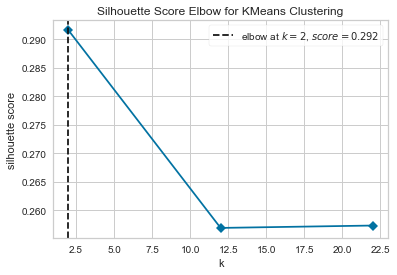

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [42]:
#150
ks = np.arange(2,25, 10)
model = KMeans()
visualizer = KElbowVisualizer(model, k=ks, timings=False, metric= "silhouette")

visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()   

In [43]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.29157066339740073
Silhouette score for k=3: 0.2925545403999295
Silhouette score for k=4: 0.3180008159551753
Silhouette score for k=5: 0.2850624439682174
Silhouette score for k=6: 0.2796343558031211
Silhouette score for k=7: 0.2777928723487853
Silhouette score for k=8: 0.27000574214696793
Silhouette score for k=9: 0.25771039157387116
Silhouette score for k=10: 0.27069128244954
Silhouette score for k=11: 0.26478481562773953
Silhouette score for k=12: 0.26066666464834887
Silhouette score for k=13: 0.25627687982861924
Silhouette score for k=14: 0.2552842287125787
Silhouette score for k=15: 0.24972289192758743
Silhouette score for k=16: 0.24847297590267245
Silhouette score for k=17: 0.2558455527876669
Silhouette score for k=18: 0.2488219112943378
Silhouette score for k=19: 0.2526584356520984
Silhouette score for k=20: 0.25532622950438844
Silhouette score for k=25: 0.26182332378770273


In [44]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=15, random_state=42)

In [ ]:
# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", kmeans)

In [ ]:
print("Inertia: {}".format(kmeans.inertia_))

In [ ]:
clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSide_jungler_deaths_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSide_jungler_deaths_df)
clusterMinMaxValues_df

K-means with k = 3

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

In [ ]:
# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", kmeans)

In [ ]:
print("Inertia: {}".format(kmeans.inertia_))

In [ ]:
clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSide_jungler_deaths_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSide_jungler_deaths_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSide_jungler_deaths_df, colors)

K-means with k = 4

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=4, random_state=42)

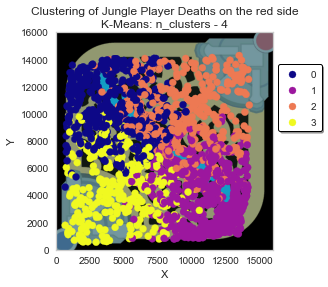

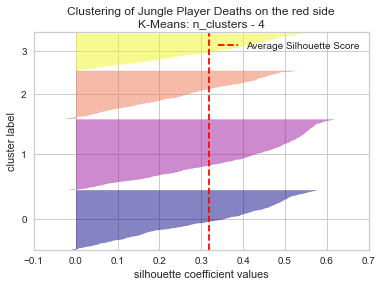

Silhouette score: 0.3180008159551753
1    774
0    655
2    529
3    401
Name: cluster, dtype: int64


In [ ]:
# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_
colors = oldVisualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", kmeans)

In [ ]:
colors

['#0d0887', '#9c179e', '#ed7953', '#f0f921']

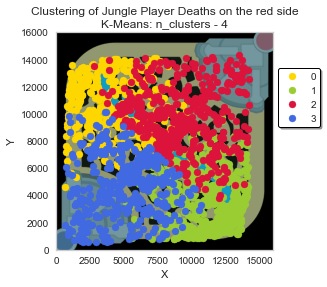

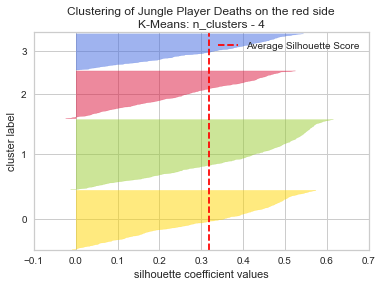

Silhouette score: 0.3180008159551753
1    774
0    655
2    529
3    401
Name: cluster, dtype: int64


In [ ]:
# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_
cluster_colors = np.array(["gold", "yellowgreen", "crimson", "royalblue"])
colors = visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", kmeans, cluster_colors)

In [ ]:
print("Inertia: {}".format(kmeans.inertia_))

In [ ]:
clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSide_jungler_deaths_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSide_jungler_deaths_df)
clusterMinMaxValues_df

In [ ]:
colors

['#0d0887', '#9c179e', '#ed7953', '#f0f921']

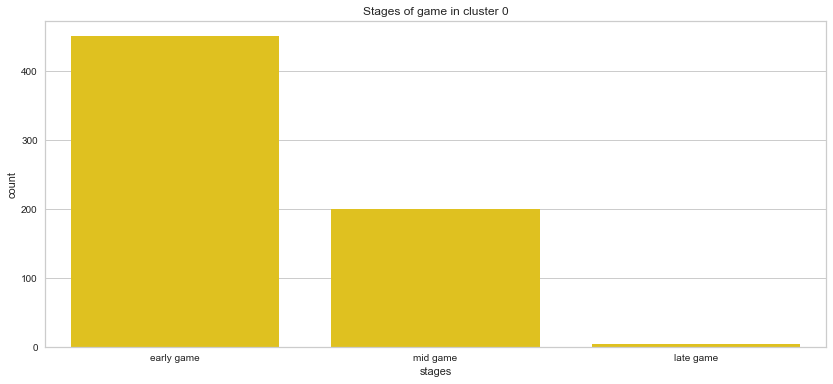

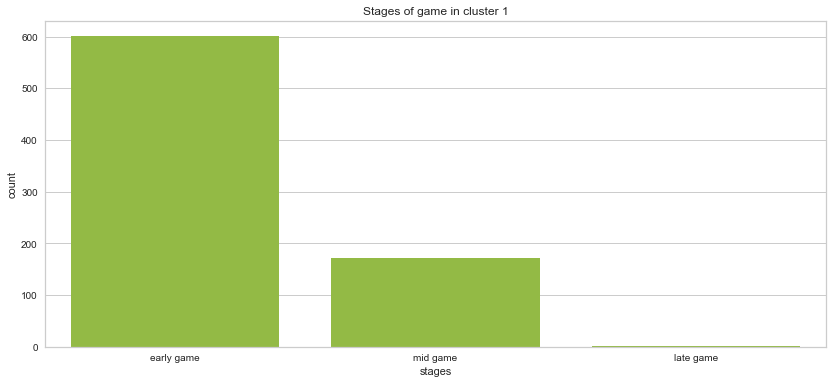

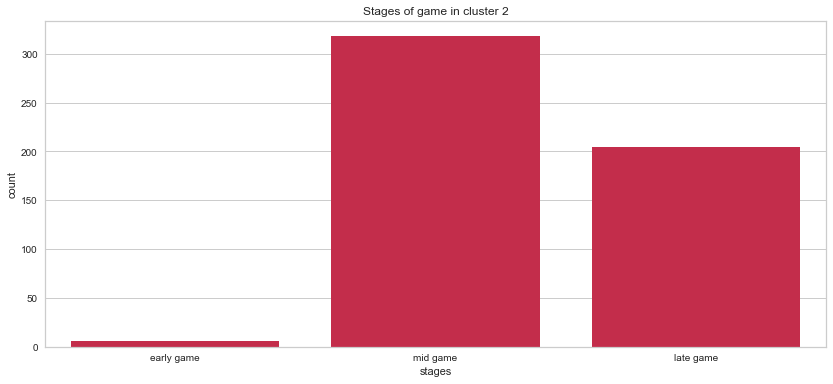

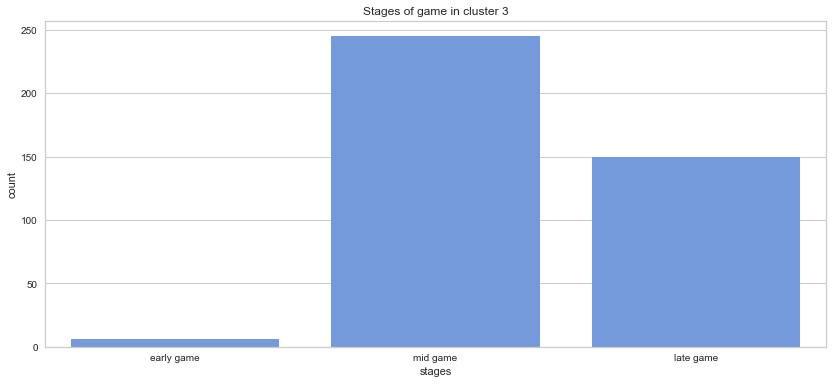

In [ ]:
stagesPerCluster(redSide_jungler_deaths_df, colors)

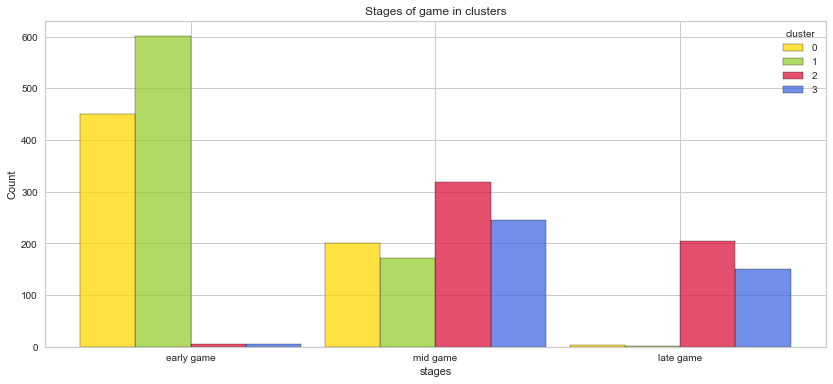

In [ ]:
stagesPerClusterV2(redSide_jungler_deaths_df, colors)

In [ ]:
scatterTimestamp(redSide_jungler_deaths_df)

In [ ]:
import matplotlib
print(matplotlib.get_backend())

agg


In [ ]:
matplotlib.use('nbagg')

In [ ]:
matplotlib.use('Qt5Agg')


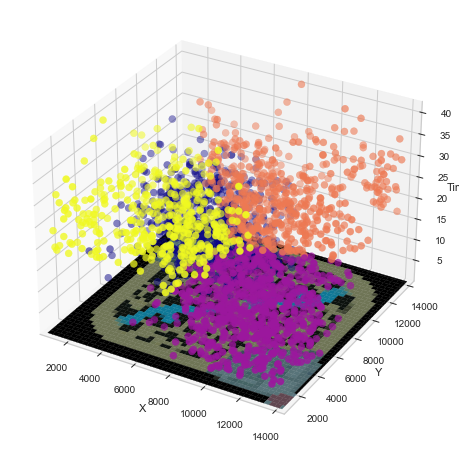

In [ ]:
#%matplotlib notebook
#%matplotlib ipympl
#%matplotlib widget
#%matplotlib qt

img = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/map11.png")
#img = img.astype(float) / 255.0

fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False


ax = fig.add_subplot(111, projection='3d')  

# Plot the image on the ground
x, y = np.meshgrid(np.linspace(redSide_jungler_deaths_df['coordinate_x'].min(), redSide_jungler_deaths_df['coordinate_x'].max(), img.shape[1]),
                   np.linspace(redSide_jungler_deaths_df['coordinate_y'].min(), redSide_jungler_deaths_df['coordinate_y'].max(), img.shape[0]))

# Set the x and y limits based on the data
ax.set_xlim([redSide_jungler_deaths_df['coordinate_x'].min(), redSide_jungler_deaths_df['coordinate_x'].max()])
ax.set_ylim([redSide_jungler_deaths_df['coordinate_y'].min(), redSide_jungler_deaths_df['coordinate_y'].max()])
z = np.zeros_like(x)
#plot figure
ax.plot_surface(x,y,z, alpha = 1,
                facecolors = img, zorder = -1, rasterized = True)

# Plot the image on the ground
#ax.imshow(img, extent=[redSide_jungler_deaths_df['coordinate_x'].min(), redSide_jungler_deaths_df['coordinate_x'].max(),
#                       redSide_jungler_deaths_df['coordinate_y'].min(), redSide_jungler_deaths_df['coordinate_y'].max()], aspect="auto")


# Iterate over the clusters and plot each one with a different color
#for i, label in enumerate(redSide_jungler_deaths_df['cluster'].unique()):
#    subset = redSide_jungler_deaths_df[redSide_jungler_deaths_df['cluster'] == label]
    
ax.scatter(redSide_jungler_deaths_df['coordinate_x'], redSide_jungler_deaths_df['coordinate_y'], redSide_jungler_deaths_df['timestamp'], c= redSide_jungler_deaths_df["cluster"],cmap="plasma", s=50)

# Set axis labels and limits
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Time')
ax.set_zlim([redSide_jungler_deaths_df['timestamp'].min(), redSide_jungler_deaths_df['timestamp'].max()])

# Remove unnecessary components from the figure
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

#ax.view_init(45, 0)
#20 15
plt.show()

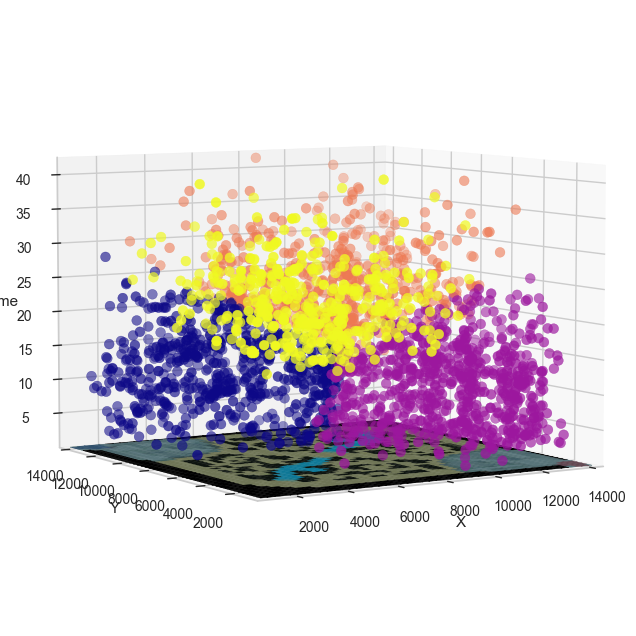

In [ ]:
%matplotlib inline

In [ ]:
print(pv.__version__)
print(vtk.vtkVersion().GetVTKVersion())

In [ ]:
import os
os.environ['PYVISTA_OFF_SCREEN'] = 'false'

In [ ]:
pv.start_xvfb()
redSide_jungler_deaths_df = redSide_jungler_deaths_df.sort_values(by='timestamp')
redSide_jungler_deaths_df2 = redSide_jungler_deaths_df
redSide_jungler_deaths_df2["timestamp"] = redSide_jungler_deaths_df["timestamp"].mul(200)
points = np.column_stack((redSide_jungler_deaths_df2['coordinate_x'].to_numpy(), redSide_jungler_deaths_df2['coordinate_y'].to_numpy(), redSide_jungler_deaths_df2['timestamp'].to_numpy()))
grid = pv.UnstructuredGrid()
grid.points = points

# Assign cluster labels to points
cluster_labels = redSide_jungler_deaths_df2["cluster"]
if len(cluster_labels) != grid.GetNumberOfPoints():
    print("Error: Number of cluster labels does not match number of points")
else:
    cluster_labels = np.expand_dims(cluster_labels, axis=1)
    cluster_data = vtk.vtkIntArray()
    cluster_data.SetNumberOfComponents(1)
    cluster_data.SetName('cluster')
    cluster_data.SetArray(cluster_labels, grid.GetNumberOfPoints(), 1)

grid.GetPointData().AddArray(cluster_data)

# Create cell array
cells = vtk.vtkCellArray()

# Create vertices for each point and add them to the cell array
for i in range(grid.GetNumberOfPoints()):
    vertex = vtk.vtkVertex()
    vertex.GetPointIds().SetId(0, i)
    cells.InsertNextCell(vertex)

# Assign cell array to the grid
grid.SetCells(vtk.VTK_VERTEX, cells)

# Create plane mesh with the same dimensions as XY plane
xmin, xmax, ymin, ymax, zmin, zmax = grid.bounds
ground = pv.Plane(center = ((xmax-xmin)/2, (ymax-ymin)/2, -1), i_size=(16000), j_size=(16000), i_resolution=1, j_resolution=1)
ground.rotate_x(360)



# Load texture image and map it onto the plane
texture_path = "/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/map11.png"
texture = pv.read_texture(texture_path)
ground.texture_map_to_plane(inplace=True)


plotter = pv.Plotter()


plotter.add_mesh(grid, scalars='cluster', cmap='Set1')
plotter.add_mesh(ground, texture=texture)


#plotter.camera_position = [(redSide_jungler_deaths_df2['coordinate_x'].min()+redSide_jungler_deaths_df2['coordinate_y'].max())/2, (redSide_jungler_deaths_df2['coordinate_x'].min()+redSide_jungler_deaths_df2['coordinate_y'].max())/2, redSide_jungler_deaths_df2['timestamp'].max()*2]
#plotter.camera_orientation = [180, -90, 0]



plotter.show()

Widget(value="<iframe src='http://localhost:35107/index.html?ui=P_0x7f87dfa3fb80_1&reconnect=auto' style='widt…

In [ ]:
print(grid)

UnstructuredGrid (0x7f53e521a100)
  N Cells:    2359
  N Points:   2359
  X Bounds:   6.780e+02, 1.423e+04
  Y Bounds:   5.580e+02, 1.430e+04
  Z Bounds:   7.311e-01, 4.168e+01
  N Arrays:   1



In [ ]:
print(ground)

PolyData (0x7f8220196160)
  N Cells:    1
  N Points:   4
  N Strips:   0
  X Bounds:   6.780e+02, 1.423e+04
  Y Bounds:   5.815e+02, 1.432e+04
  Z Bounds:   7.452e+03, 7.452e+03
  N Arrays:   3



K-means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

In [ ]:
# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", kmeans)

In [ ]:
clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSide_jungler_deaths_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSide_jungler_deaths_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSide_jungler_deaths_df, colors)

In [ ]:
scatterTimestamp(redSide_jungler_deaths_df)

K-Means with k = 12

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", kmeans)

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSide_jungler_deaths_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSide_jungler_deaths_df)
clusterMinMaxValues_df

K-Means with k = 9

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", kmeans)

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSide_jungler_deaths_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSide_jungler_deaths_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSide_jungler_deaths_df)

In [ ]:
scatterTimestamp(redSide_jungler_deaths_df)

K-Means with k = 7

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", kmeans)

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSide_jungler_deaths_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSide_jungler_deaths_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSide_jungler_deaths_df)

In [ ]:
scatterTimestamp(redSide_jungler_deaths_df)

K-Means with k = 5

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", kmeans)

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSide_jungler_deaths_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSide_jungler_deaths_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSide_jungler_deaths_df)

In [ ]:
scatterTimestamp(redSide_jungler_deaths_df)

---
### Clustering Blue Side Junglers

In [ ]:
blueSide_jungler_deaths_df = blueSide_jungler_deaths_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSide_jungler_deaths_df

In [ ]:
blueSide_jungler_deaths_df.info()

Normalize Data:

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSide_jungler_deaths_df)
data_scaled

#### K-Means:

In [ ]:
#150
ks = np.arange(2,50, 10)
model = KMeans()
visualizer = KElbowVisualizer(model, k=ks, timings=False, metric= "silhouette")

visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()   

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

K-Means with k = 15

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(data_scaled)

In [ ]:
# Add the cluster labels to the original dataframe
blueSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(blueSide_jungler_deaths_df, data_scaled, kmeans, "on the blue side", kmeans)

In [ ]:
print("Inertia: {}".format(kmeans.inertia_))

In [ ]:
clusterMeanValues_df = clusterMeanValues(blueSide_jungler_deaths_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSide_jungler_deaths_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSide_jungler_deaths_df)
clusterMinMaxValues_df

K-Means with k = 4

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=4, random_state=42)

In [ ]:
# Add the cluster labels to the original dataframe
blueSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(blueSide_jungler_deaths_df, data_scaled, kmeans, "on the blue side", kmeans)

ValueError: Length of values (2359) does not match length of index (1896)

In [ ]:
print("Inertia: {}".format(kmeans.inertia_))

In [ ]:
clusterMeanValues_df = clusterMeanValues(blueSide_jungler_deaths_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSide_jungler_deaths_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSide_jungler_deaths_df)
clusterMinMaxValues_df

K-Means with k = 3

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(blueSide_jungler_deaths_df, data_scaled, kmeans, "on the blue side", kmeans)

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSide_jungler_deaths_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSide_jungler_deaths_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSide_jungler_deaths_df)
clusterMinMaxValues_df

K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(blueSide_jungler_deaths_df, data_scaled, kmeans, "on the blue side", kmeans)

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSide_jungler_deaths_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSide_jungler_deaths_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSide_jungler_deaths_df)
clusterMinMaxValues_df

K-Means with k = 12

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(blueSide_jungler_deaths_df, data_scaled, kmeans, "on the blue side", kmeans)

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSide_jungler_deaths_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSide_jungler_deaths_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSide_jungler_deaths_df)
clusterMinMaxValues_df

K-Means with k = 9

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(blueSide_jungler_deaths_df, data_scaled, kmeans, "on the blue side", kmeans)

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSide_jungler_deaths_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSide_jungler_deaths_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSide_jungler_deaths_df)
clusterMinMaxValues_df

K-Means with k = 7

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(blueSide_jungler_deaths_df, data_scaled, kmeans, "on the blue side", kmeans)

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSide_jungler_deaths_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSide_jungler_deaths_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSide_jungler_deaths_df)
clusterMinMaxValues_df

K-Means with k = 5

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(blueSide_jungler_deaths_df, data_scaled, kmeans, "on the blue side", kmeans)

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSide_jungler_deaths_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSide_jungler_deaths_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSide_jungler_deaths_df)
clusterMinMaxValues_df

---
### Clustering Junglers

In [ ]:
jungler_deaths_df = jungler_deaths_df[["coordinate_x","coordinate_y","timestamp"]].copy()
jungler_deaths_df

Normalize Data:

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(jungler_deaths_df)
data_scaled

In [ ]:
#150
ks = np.arange(2,55, 10)
model = KMeans()
visualizer = KElbowVisualizer(model, k=ks, timings=False, metric= "silhouette")

visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()   

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

---
### Clustering Red Team Victory

In [46]:
redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6038,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,5.124400,7396.0,6838.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6041,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,6.737800,10140.0,2505.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6221,EUW1_6272349243,Red,anonymous 24,euw1,LeeSin,7.901383,4114.0,7822.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6226,EUW1_6272349243,Red,anonymous 24,euw1,LeeSin,10.258183,5128.0,3384.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6253,EUW1_6272349243,Red,anonymous 24,euw1,LeeSin,23.224517,5090.0,9540.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275607,KR_6376002673,Red,anonymous 48,kr,Gragas,22.257083,6048.0,5969.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275614,KR_6376002673,Red,anonymous 48,kr,Gragas,25.482650,6742.0,4329.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275648,KR_6375973806,Red,anonymous 48,kr,Gragas,12.092683,4159.0,10322.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [47]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)].copy()

In [ ]:
winsRedSide = len(np.unique(redSideVictory_df["gameId"]))

In [ ]:
winRateRedSide = (winsRedSide / gamesRedSide) * 100
winRateRedSide

59.523809523809526

In [ ]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

47.39296311996608

In [ ]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 won 16 matches on the red side
anonymous 24 has an average of 4.25 deaths per game when winning on the red side

anonymous 25 won 15 matches on the red side
anonymous 25 has an average of 5.133333333333334 deaths per game when winning on the red side

anonymous 26 won 26 matches on the red side
anonymous 26 has an average of 3.8461538461538463 deaths per game when winning on the red side

anonymous 27 won 8 matches on the red side
anonymous 27 has an average of 6.0 deaths per game when winning on the red side

anonymous 28 won 6 matches on the red side
anonymous 28 has an average of 3.6666666666666665 deaths per game when winning on the red side

anonymous 29 won 24 matches on the red side
anonymous 29 has an average of 4.375 deaths per game when winning on the red side

anonymous 30 won 16 matches on the red side
anonymous 30 has an average of 3.125 deaths per game when winning on the red side

anonymous 31 won 26 matches on the red side
anonymous 31 has an average of 5.9

In [ ]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 275 matches in which the jungler died at least once
20 players died a total of 1118 times on the red side
Victory games on red side contains an average of 4.065454545454545 deaths per game


In [48]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

,coordinate_x,coordinate_y,timestamp
6038,7396.0,6838.0,5.124400
6041,10140.0,2505.0,6.737800
6221,4114.0,7822.0,7.901383
6226,5128.0,3384.0,10.258183
6253,5090.0,9540.0,23.224517
...,...,...,...
275607,6048.0,5969.0,22.257083
275614,6742.0,4329.0,25.482650
275648,4159.0,10322.0,12.092683
275750,5575.0,8675.0,12.166683


Normalize Data:

In [49]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideVictory_df)
data_scaled

array([[ 0.10323976,  0.10633629, -1.32178697],
       [ 0.92098619, -1.20764891, -1.12012589],
       [-0.87483743,  0.40473496, -0.97468801],
       ...,
       [-0.86142686,  1.16286166, -0.45081167],
       [-0.43944109,  0.66340779, -0.44156231],
       [ 0.39857019, -0.32458293, -0.18878809]])

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

K-Means with k = 12

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

In [ ]:
scatterTimestamp(redSideVictory_df)

K-Means with k = 9

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

In [ ]:
scatterTimestamp(redSideVictory_df)

K-Means with k = 7

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

In [ ]:
scatterTimestamp(redSideVictory_df)

K-Means with k = 5

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

In [ ]:
scatterTimestamp(redSideVictory_df)

K-Means with k = 4

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

In [ ]:
scatterTimestamp(redSideVictory_df)

K-Means with k = 3

[[10322.5862069   4376.66502463    10.94482525]
 [ 5472.41212121  5248.95151515    24.37434369]
 [ 4933.39267016  9800.45026178    13.25870528]]


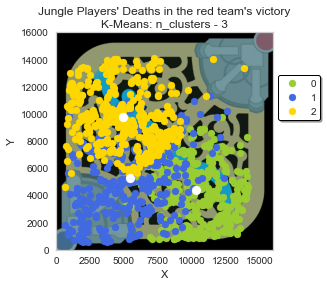

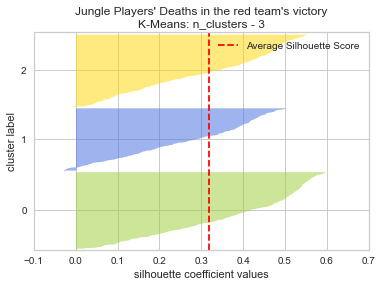

Silhouette score: 0.3185664901450735
0    406
2    382
1    330
Name: cluster, dtype: int64

Inertia: 1577.5123458516016

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10322.586207,4376.665025,10.944825
1,1,5472.412121,5248.951515,24.374344
2,2,4933.392670,9800.450262,13.258705


In [50]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "royalblue", "gold"])
colors = visualizeResultsWithCentroids(redSideVictory_df, data_scaled,scaler, kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1975.783261,2044.107278,5.769071
1,1,2561.216264,2655.365599,4.973918
2,2,2263.963954,2063.262152,5.966207


In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14129.0,5128.0,9765.0,791.0,27.738867,0.784400
1,1,12568.0,680.0,11413.0,572.0,40.960933,13.914550
2,2,13818.0,678.0,14089.0,4615.0,31.235050,0.756083


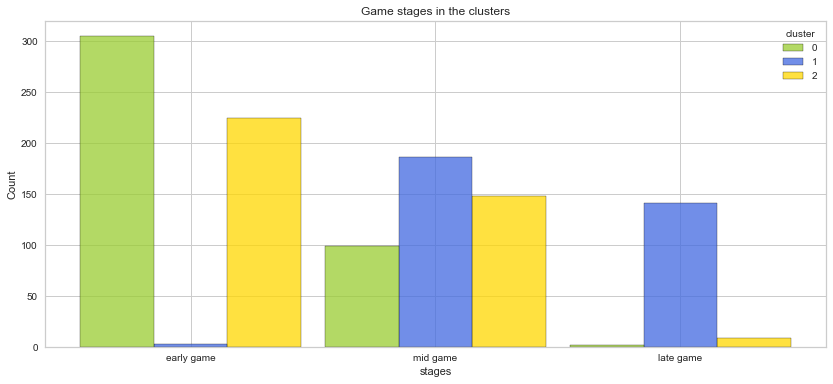

In [ ]:
stagesPerClusterV2(redSideVictory_df, colors)

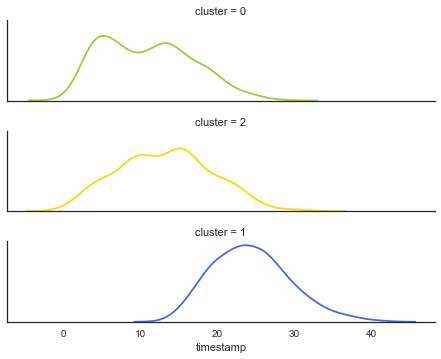

In [ ]:
c = {"color": cluster_colors}

sns.set_style("whitegrid")
clusters = profiling_df.cluster.value_counts().index
sea = sns.FacetGrid(profiling_df, row = "cluster",
                    row_order = clusters,
                    height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
 
sea.map(sns.kdeplot, "timestamp")
sea.set(yticklabels=[])
sea.set(ylabel=None)
#plt.grid(False)
    
plt.show()

In [51]:
pv.start_xvfb()
redSide_jungler_deaths_df2 = redSideVictory_df.sort_values(by='timestamp')
redSide_jungler_deaths_df3 = redSide_jungler_deaths_df2
redSide_jungler_deaths_df2["timestamp"] = redSide_jungler_deaths_df["timestamp"].mul(200)
points = np.column_stack((redSide_jungler_deaths_df2['coordinate_x'].to_numpy(), redSide_jungler_deaths_df3['coordinate_y'].to_numpy(), redSide_jungler_deaths_df3['timestamp'].to_numpy()))
grid = pv.UnstructuredGrid()
grid.points = points

# Assign cluster labels to points
cluster_labels = redSide_jungler_deaths_df3["cluster"]
if len(cluster_labels) != grid.GetNumberOfPoints():
    print("Error: Number of cluster labels does not match number of points")
else:
    cluster_labels = np.expand_dims(cluster_labels, axis=1)
    cluster_data = vtk.vtkIntArray()
    cluster_data.SetNumberOfComponents(1)
    cluster_data.SetName('cluster')
    cluster_data.SetArray(cluster_labels, grid.GetNumberOfPoints(), 1)

grid.GetPointData().AddArray(cluster_data)

# Create cell array
cells = vtk.vtkCellArray()

# Create vertices for each point and add them to the cell array
for i in range(grid.GetNumberOfPoints()):
    vertex = vtk.vtkVertex()
    vertex.GetPointIds().SetId(0, i)
    cells.InsertNextCell(vertex)

# Assign cell array to the grid
grid.SetCells(vtk.VTK_VERTEX, cells)

# Create plane mesh with the same dimensions as XY plane
xmin, xmax, ymin, ymax, zmin, zmax = grid.bounds
ground = pv.Plane(center = ((xmax-xmin)/2, (ymax-ymin)/2, -1), i_size=(16000), j_size=(16000), i_resolution=1, j_resolution=1)
ground.rotate_x(360)



# Load texture image and map it onto the plane
texture_path = "/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/map11.png"
texture = pv.read_texture(texture_path)
ground.texture_map_to_plane(inplace=True)


plotter = pv.Plotter()


plotter.add_mesh(grid, scalars='cluster', cmap=["yellowgreen", "royalblue", "gold"])
plotter.add_mesh(ground, texture=texture)


#plotter.camera_position = [(redSide_jungler_deaths_df2['coordinate_x'].min()+redSide_jungler_deaths_df2['coordinate_y'].max())/2, (redSide_jungler_deaths_df2['coordinate_x'].min()+redSide_jungler_deaths_df2['coordinate_y'].max())/2, redSide_jungler_deaths_df2['timestamp'].max()*2]
#plotter.camera_orientation = [180, -90, 0]



plotter.show()

Widget(value="<iframe src='http://localhost:35453/index.html?ui=P_0x7f718bc8d220_0&reconnect=auto' style='widt…

Matches played with each champion:

In [66]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
LeeSin,37
Gragas,22
MonkeyKing,20
Vi,20
Viego,17
Maokai,16
Sylas,16
Nidalee,15
Elise,13
Kindred,12


Deaths with each champion:

In [67]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



LeeSin         127
Vi              89
MonkeyKing      87
Viego           81
Gragas          74
Sylas           66
Maokai          63
Kindred         54
Karthus         52
Graves          51
Nidalee         50
Lillia          49
Elise           45
JarvanIV        42
Sejuani         21
AurelionSol     18
XinZhao         18
Amumu           14
Kayn            14
Talon           14
RekSai          12
Poppy           11
Trundle         10
Evelynn         10
Khazix           9
Rengar           9
Taliyah          9
Qiyana           5
Zed              4
Jayce            3
Hecarim          3
Nunu             2
Diana            2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [47]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 33 champions when they won on the red side

Cluster 0 - 30 champions:
 ['Amumu' 'AurelionSol' 'Diana' 'Elise' 'Evelynn' 'Gragas' 'Graves'
 'JarvanIV' 'Jayce' 'Karthus' 'Kayn' 'Kindred' 'LeeSin' 'Lillia' 'Maokai'
 'MonkeyKing' 'Nidalee' 'Poppy' 'Qiyana' 'RekSai' 'Rengar' 'Sejuani'
 'Sylas' 'Taliyah' 'Talon' 'Trundle' 'Vi' 'Viego' 'XinZhao' 'Zed']
LeeSin         53
Viego          34
Vi             26
Gragas         25
Kindred        24
MonkeyKing     24
Maokai         23
Nidalee        22
Sylas          21
Elise          19
Lillia         18
JarvanIV       17
Graves         16
Karthus        16
Sejuani        11
AurelionSol     6
RekSai          6
Talon           6
Amumu           6
Kayn            6
Poppy           5
Rengar          5
XinZhao         4
Trundle         4
Evelynn         3
Jayce           2
Qiyana          1
Zed             1
Diana           1
Taliyah         1
Name: champion, dtype: int64

Cluster 1 - 32 champions:
 ['Amumu' 'AurelionSol' 'Dia

In [33]:
kmeans.cluster_centers_

array([[ 0.97539917, -0.64006522, -0.59428403],
       [-0.47001357, -0.37554375,  1.08428991],
       [-0.63064813,  1.00470135, -0.30506899]])

In [32]:
pv.start_xvfb()
redSideVictory_df =redSideVictory_df.sort_values(by='timestamp')
redSideVictory_df2 =redSideVictory_df
redSideVictory_df2["timestamp"] =redSideVictory_df["timestamp"].mul(100)
points = np.column_stack((redSideVictory_df2['coordinate_x'].to_numpy(),redSideVictory_df2['coordinate_y'].to_numpy(),redSideVictory_df2['timestamp'].to_numpy()))
grid = pv.UnstructuredGrid()
grid.points = points

# Assign cluster labels to points
cluster_labels =redSideVictory_df2["cluster"]
if len(cluster_labels) != grid.GetNumberOfPoints():
    print("Error: Number of cluster labels does not match number of points")
else:
    cluster_labels = np.expand_dims(cluster_labels, axis=1)
    cluster_data = vtk.vtkIntArray()
    cluster_data.SetNumberOfComponents(1)
    cluster_data.SetName('cluster')
    cluster_data.SetArray(cluster_labels, grid.GetNumberOfPoints(), 1)

grid.GetPointData().AddArray(cluster_data)

# Create cell array
cells = vtk.vtkCellArray()

# Create vertices for each point and add them to the cell array
for i in range(grid.GetNumberOfPoints()):
    vertex = vtk.vtkVertex()
    vertex.GetPointIds().SetId(0, i)
    cells.InsertNextCell(vertex)

# Assign cell array to the grid
grid.SetCells(vtk.VTK_VERTEX, cells)

# Create plane mesh with the same dimensions as XY plane
xmin, xmax, ymin, ymax, zmin, zmax = grid.bounds
ground = pv.Plane(center = ((xmax-xmin)/2, (ymax-ymin)/2, -1), i_size=(16000), j_size=(16000), i_resolution=1, j_resolution=1)
ground.rotate_x(360)



# Load texture image and map it onto the plane
texture_path = "/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/map11.png"
texture = pv.read_texture(texture_path)
ground.texture_map_to_plane(inplace=True)


plotter = pv.Plotter()


plotter.add_mesh(grid, scalars='cluster', cmap='Set1')
plotter.add_mesh(ground, texture=texture)


#plotter.camera_position = [(redredSideVictory_df2['coordinate_x'].min()+redredSideVictory_df2['coordinate_y'].max())/2, (redredSideVictory_df2['coordinate_x'].min()+redredSideVictory_df2['coordinate_y'].max())/2,redSideVictory_df2['timestamp'].max()*2]
#plotter.camera_orientation = [180, -90, 0]



plotter.show()

Widget(value="<iframe src='http://localhost:42271/index.html?ui=P_0x7f68cbf4ec40_1&reconnect=auto' style='widt…

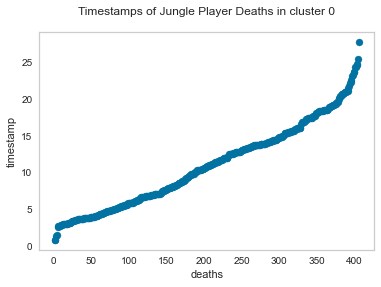

<Figure size 144000x432 with 0 Axes>

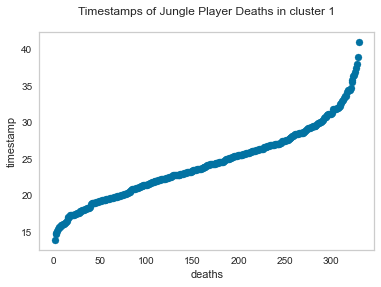

<Figure size 144000x432 with 0 Axes>

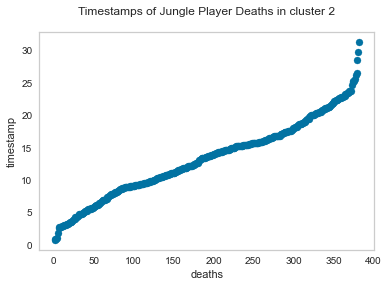

<Figure size 144000x432 with 0 Axes>

In [45]:
scatterTimestamp(redSideVictory_df)

K-Means with k = 2

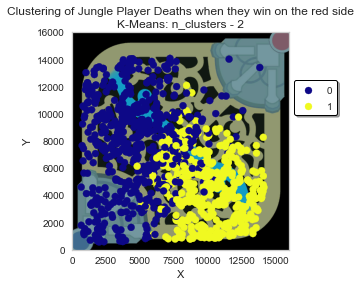

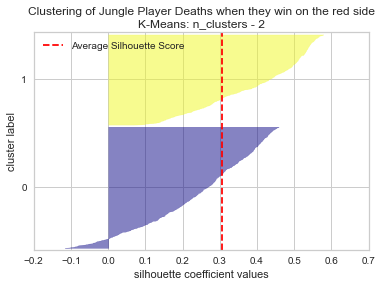

Silhouette score: 0.3065433211883323
0    641
1    477
Name: cluster, dtype: int64

Inertia: 2214.879977090049

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,4883.421217,7859.344774,18.982378
1,1,9960.480084,4643.631027,11.287744


In [46]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [47]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2334.660947,3286.373610,7.602992
1,1,2070.603996,2246.032959,6.196670


In [48]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,13818.0,678.0,14089.0,572.0,40.960933,1.011533
1,1,14129.0,4795.0,12100.0,791.0,32.147700,0.756083


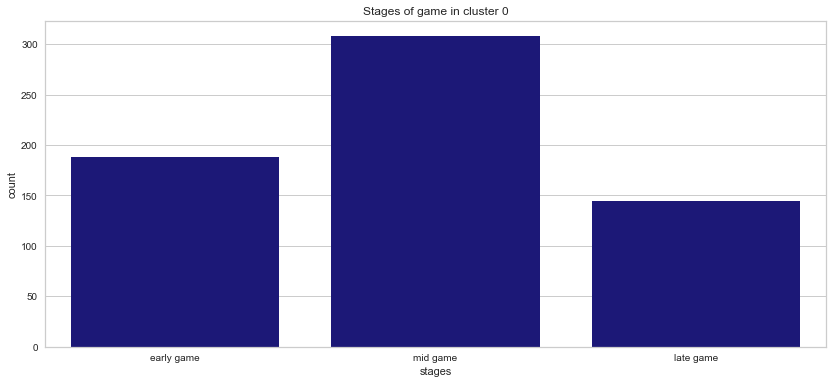

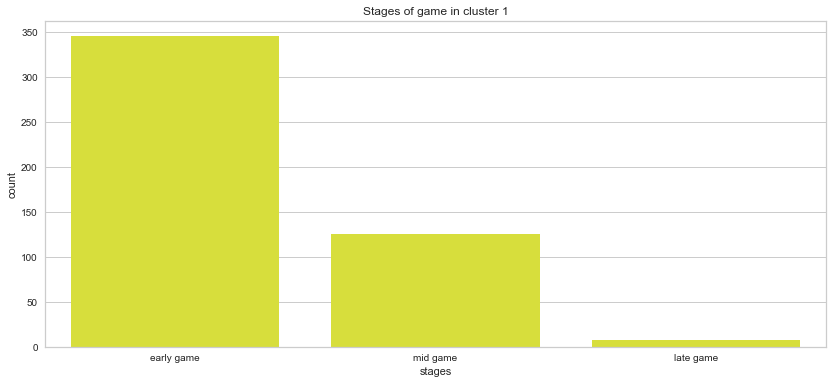

In [49]:
stagesPerCluster(redSideVictory_df, colors)

In [ ]:
scatterTimestamp(redSideVictory_df)

---
### Clustering Red Team Defeat

In [70]:
redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5915,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,5.672050,8286.0,7654.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5938,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,17.020000,10048.0,8002.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5946,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,21.701117,6100.0,11267.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5951,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,23.496983,9475.0,8919.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5958,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,27.062767,11804.0,13243.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275670,KR_6375903925,Red,anonymous 48,kr,Elise,4.274650,7985.0,3502.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275702,KR_6375903925,Red,anonymous 48,kr,Elise,20.639133,4859.0,10824.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275711,KR_6375903925,Red,anonymous 48,kr,Elise,26.279650,1722.0,9788.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275716,KR_6375903925,Red,anonymous 48,kr,Elise,29.629633,3384.0,11610.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [71]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)].copy()

In [26]:
winRateRedSide = (redSideDefeat_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

52.60703688003391

In [36]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 lost 9 matches on the red side
anonymous 24 has an average of 6.333333333333333 deaths per game when losing on the red side

anonymous 25 lost 24 matches on the red side
anonymous 25 has an average of 7.333333333333333 deaths per game when losing on the red side

anonymous 26 lost 17 matches on the red side
anonymous 26 has an average of 6.411764705882353 deaths per game when losing on the red side

anonymous 27 lost 9 matches on the red side
anonymous 27 has an average of 7.222222222222222 deaths per game when losing on the red side

anonymous 28 lost 5 matches on the red side
anonymous 28 has an average of 8.0 deaths per game when losing on the red side

anonymous 29 lost 10 matches on the red side
anonymous 29 has an average of 6.5 deaths per game when losing on the red side

anonymous 30 lost 10 matches on the red side
anonymous 30 has an average of 5.8 deaths per game when losing on the red side

anonymous 31 lost 16 matches on the red side
anonymous 31 has an average

In [31]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 187 matches in which the jungler died at least once
20 players died a total of 1241 times on the red side
Defeat games on red side contains an average of 6.636363636363637 deaths per game


In [72]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

,coordinate_x,coordinate_y,timestamp
5915,8286.0,7654.0,5.672050
5938,10048.0,8002.0,17.020000
5946,6100.0,11267.0,21.701117
5951,9475.0,8919.0,23.496983
5958,11804.0,13243.0,27.062767
...,...,...,...
275670,7985.0,3502.0,4.274650
275702,4859.0,10824.0,20.639133
275711,1722.0,9788.0,26.279650
275716,3384.0,11610.0,29.629633


Normalize Data:

In [73]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideDefeat_df)
data_scaled

array([[-0.00668581, -0.04079384, -1.3539674 ],
       [ 0.52654086,  0.05998846,  0.0111901 ],
       [-0.66822583,  1.00554654,  0.57432807],
       ...,
       [-1.99312162,  0.57722177,  1.12512527],
       [-1.49015753,  1.10488082,  1.52812801],
       [-0.53385997,  1.81962426,  1.88686839]])

In [34]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.2997527562365371
Silhouette score for k=3: 0.31222621718105226
Silhouette score for k=4: 0.30710016756956493
Silhouette score for k=5: 0.28265782874366574
Silhouette score for k=6: 0.2848066442078147
Silhouette score for k=7: 0.285882791673986
Silhouette score for k=8: 0.27774307245133967
Silhouette score for k=9: 0.2669526444126833
Silhouette score for k=10: 0.26357924855838905
Silhouette score for k=11: 0.25418273141657494
Silhouette score for k=12: 0.25089690462117753
Silhouette score for k=13: 0.25748347409952826
Silhouette score for k=14: 0.255083296327284
Silhouette score for k=15: 0.25671165370256355
Silhouette score for k=16: 0.25474404463181816
Silhouette score for k=17: 0.2519332865990157
Silhouette score for k=18: 0.25497548148288207
Silhouette score for k=19: 0.2567317511520679
Silhouette score for k=20: 0.2634171744921779
Silhouette score for k=25: 0.26248970379935066


K-Means with k = 12

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

In [ ]:
scatterTimestamp(redSideDefeat_df)

K-Means with k = 9

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

In [ ]:
scatterTimestamp(redSideDefeat_df)

K-Means with k = 7

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

In [ ]:
scatterTimestamp(redSideDefeat_df)

K-Means with k = 5

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

In [ ]:
scatterTimestamp(redSideDefeat_df)

K-Means with k = 4

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

In [ ]:
scatterTimestamp(redSideDefeat_df)

K-Means with k = 3

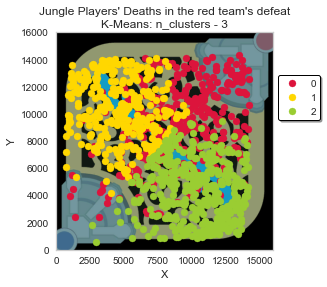

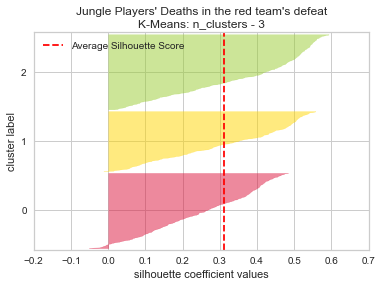

Silhouette score: 0.31222621718105226
0    444
2    443
1    354
Name: cluster, dtype: int64

Inertia: 1797.3798537831497

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,9140.324324,9105.524775,25.000074
1,1,4776.584746,10341.302260,13.339671
2,2,10296.000000,4446.383747,11.702276


In [74]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "gold", "yellowgreen"])
colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [36]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2752.287827,2665.321108,5.219295
1,1,2071.456325,2122.463859,6.291988
2,2,2226.066239,2136.690806,5.632825


In [37]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14227.0,1012.0,14300.0,2380.0,41.677333,14.384850
1,1,9560.0,753.0,14082.0,4216.0,31.615533,0.836783
2,2,14107.0,2688.0,9442.0,558.0,28.300833,0.731083


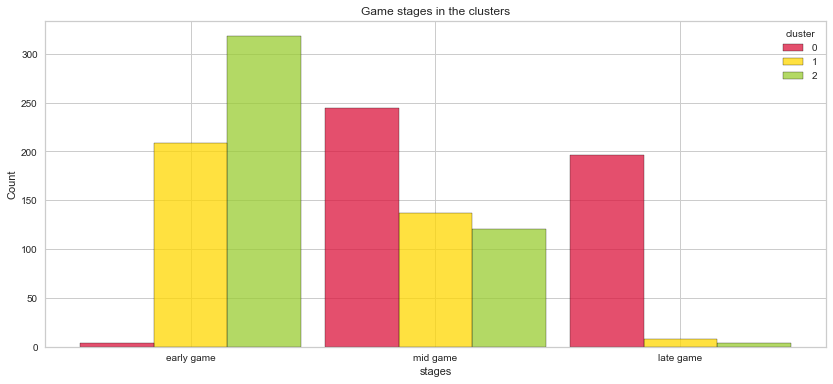

In [75]:
stagesPerClusterV2(redSideDefeat_df, colors)

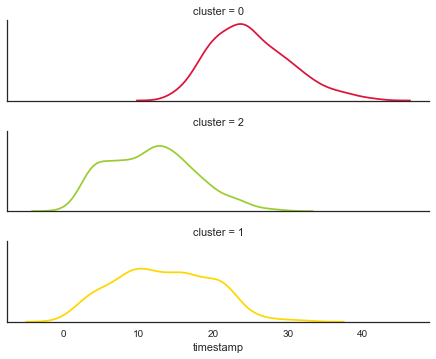

In [41]:
c = {"color": cluster_colors}

sns.set_style("whitegrid")
clusters = profiling_df.cluster.value_counts().index
sea = sns.FacetGrid(profiling_df, row = "cluster",
                    row_order = clusters,
                    height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
 
sea.map(sns.kdeplot, "timestamp")
sea.set(yticklabels=[])
sea.set(ylabel=None)
#plt.grid(False)
    
plt.show()

In [45]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))

professional players played 36 champions when they won on the red side

Cluster 0 - 34 champions:
 ['Amumu' 'Belveth' 'Diana' 'Elise' 'Evelynn' 'FiddleSticks' 'Gragas'
 'Graves' 'Ivern' 'JarvanIV' 'Jayce' 'Karthus' 'Kayn' 'Kindred' 'LeeSin'
 'Lillia' 'Maokai' 'MonkeyKing' 'Mordekaiser' 'Morgana' 'Nidalee' 'Poppy'
 'Qiyana' 'Rammus' 'RekSai' 'Rengar' 'Sejuani' 'Sylas' 'Taliyah' 'Talon'
 'Trundle' 'Vi' 'Viego' 'XinZhao']
Cluster 1 - 32 champions:
 ['Amumu' 'Belveth' 'Diana' 'Elise' 'Evelynn' 'FiddleSticks' 'Gragas'
 'Graves' 'Hecarim' 'Ivern' 'JarvanIV' 'Jayce' 'Karthus' 'Kayn' 'Kindred'
 'LeeSin' 'Lillia' 'Maokai' 'MonkeyKing' 'Mordekaiser' 'Morgana' 'Nidalee'
 'Qiyana' 'Rengar' 'Sejuani' 'Sylas' 'Taliyah' 'Talon' 'Trundle' 'Vi'
 'Viego' 'XinZhao']
Cluster 2 - 36 champions:
 ['Amumu' 'Belveth' 'Diana' 'Elise' 'Evelynn' 'FiddleSticks' 'Gragas'
 'Graves' 'Hecarim' 'Ivern' 'JarvanIV' 'Jayce' 'Karthus' 'Kayn' 'Kindred'
 'LeeSin' 'Lillia' 'Maokai' 'MonkeyKing' 'Mordekaiser' 'Morgana' 'Nidale

In [ ]:
scatterTimestamp(redSideDefeat_df)

K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

In [ ]:
scatterTimestamp(redSideDefeat_df)

---
### Clustering Blue Team Victory

In [24]:
blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6199,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,20.334733,11330.0,10690.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7176,EUW1_6274092862,Blue,anonymous 26,euw1,Maokai,6.716617,11645.0,4565.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7193,EUW1_6274092862,Blue,anonymous 26,euw1,Maokai,14.921200,9965.0,4349.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7212,EUW1_6274092862,Blue,anonymous 26,euw1,Maokai,22.328617,11123.0,10651.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7222,EUW1_6274092862,Blue,anonymous 26,euw1,Maokai,25.689900,13565.0,8599.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274945,EUW1_6289253359,Blue,anonymous 30,euw1,Gragas,17.550000,8938.0,12870.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
274953,EUW1_6289253359,Blue,anonymous 30,euw1,Gragas,20.241800,13882.0,13032.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275275,NA1_4584642620,Blue,anonymous 37,na1,Sylas,6.681717,10547.0,5428.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275292,NA1_4584642620,Blue,anonymous 37,na1,Sylas,14.535800,6292.0,10252.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [25]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)].copy()

In [26]:
winsBlueSide = len(np.unique(blueSideVictory_df["gameId"]))

In [27]:
winRateRedSide = (winsBlueSide / gamesBlueSide) * 100
winRateRedSide

46.796657381615596

In [28]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

34.59915611814346

In [38]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 won 4 matches on the blue side
anonymous 24 has an average of 2.0 deaths per game when winning on the blue side

anonymous 25 won 9 matches on the blue side
anonymous 25 has an average of 3.6666666666666665 deaths per game when winning on the blue side

anonymous 26 won 13 matches on the blue side
anonymous 26 has an average of 4.230769230769231 deaths per game when winning on the blue side

anonymous 27 won 5 matches on the blue side
anonymous 27 has an average of 5.4 deaths per game when winning on the blue side

anonymous 28 won 7 matches on the blue side
anonymous 28 has an average of 5.714285714285714 deaths per game when winning on the blue side

anonymous 29 won 12 matches on the blue side
anonymous 29 has an average of 4.083333333333333 deaths per game when winning on the blue side

anonymous 30 won 16 matches on the blue side
anonymous 30 has an average of 3.875 deaths per game when winning on the blue side

anonymous 31 won 9 matches on the blue side
anonymous 31

In [24]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 168 matches in which the jungler died at least once
20 players died a total of 656 times on the blue side
Victory games on blue side contains an average of 3.9047619047619047 deaths per game


In [78]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

,coordinate_x,coordinate_y,timestamp
6199,11330.0,10690.0,20.334733
7176,11645.0,4565.0,6.716617
7193,9965.0,4349.0,14.921200
7212,11123.0,10651.0,22.328617
7222,13565.0,8599.0,25.689900
...,...,...,...
274945,8938.0,12870.0,17.550000
274953,13882.0,13032.0,20.241800
275275,10547.0,5428.0,6.681717
275292,6292.0,10252.0,14.535800


Normalize Data:

In [79]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideVictory_df)
data_scaled

array([[ 0.82557746,  0.83957155,  0.57854056],
       [ 0.91527073, -0.93930555, -1.07864989],
       [ 0.4369066 , -1.0020382 , -0.08023304],
       ...,
       [ 0.6026256 , -0.6886654 , -1.08289688],
       [-0.60894546,  0.71236369, -0.12713242],
       [ 1.40075338, -0.17925308,  0.20083061]])

In [27]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.31658192669208024
Silhouette score for k=3: 0.34039185330360516
Silhouette score for k=4: 0.3233010357622542
Silhouette score for k=5: 0.2881347138189039
Silhouette score for k=6: 0.2992637907728072
Silhouette score for k=7: 0.290867540756441
Silhouette score for k=8: 0.280719381055051
Silhouette score for k=9: 0.27874312478361135
Silhouette score for k=10: 0.27048586194841007
Silhouette score for k=11: 0.2732934883044778
Silhouette score for k=12: 0.2618671188375485
Silhouette score for k=13: 0.26990833557472454
Silhouette score for k=14: 0.26411518853088306
Silhouette score for k=15: 0.25167247629272455
Silhouette score for k=16: 0.2592889408487327
Silhouette score for k=17: 0.2608414810840168
Silhouette score for k=18: 0.2602705202551009
Silhouette score for k=19: 0.2548123868744965
Silhouette score for k=20: 0.2564552888359841
Silhouette score for k=25: 0.2718784915463298


K-Means with k = 12

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

In [ ]:
scatterTimestamp(blueSideVictory_df)

K-Means with k = 9

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

In [ ]:
scatterTimestamp(blueSideVictory_df)

K-Means with k = 7

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

In [ ]:
scatterTimestamp(blueSideVictory_df)

K-Means with k = 5

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

In [ ]:
scatterTimestamp(blueSideVictory_df)

K-Means with k = 4

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

In [ ]:
scatterTimestamp(blueSideVictory_df)

K-Means with k = 3

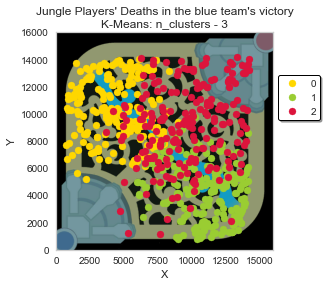

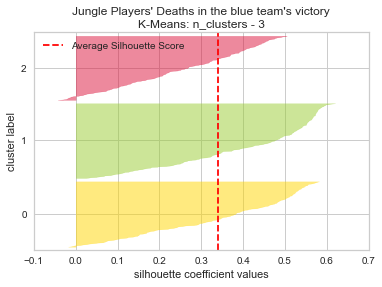

Silhouette score: 0.34039185330360516
1    240
0    210
2    206
Name: cluster, dtype: int64

Inertia: 873.5956332297906

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,4552.004762,10137.371429,12.405626
1,1,10754.458333,4533.933333,10.693595
2,2,9677.092233,9219.825243,24.510575


In [80]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

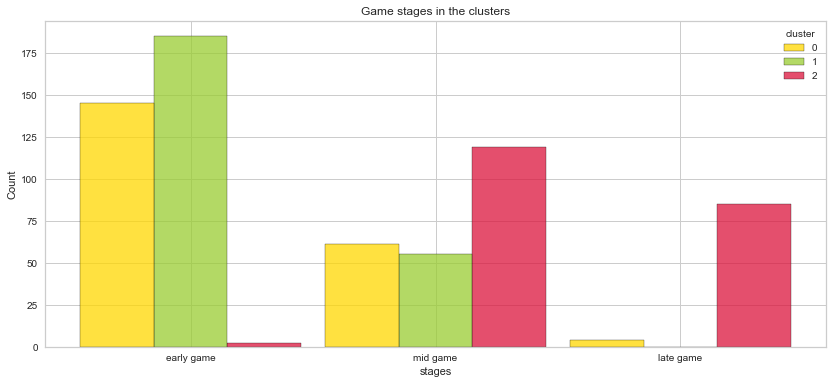

In [81]:
stagesPerClusterV2(blueSideVictory_df, colors)

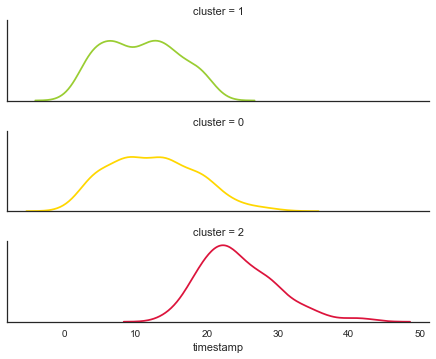

In [41]:
c = {"color": cluster_colors}

sns.set_style("whitegrid")
clusters = profiling_df.cluster.value_counts().index
sea = sns.FacetGrid(profiling_df, row = "cluster",
                    row_order = clusters,
                    height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
 
sea.map(sns.kdeplot, "timestamp")
sea.set(yticklabels=[])
sea.set(ylabel=None)
#plt.grid(False)
    
plt.show()

In [51]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))

professional players played 26 champions when they won on the red side

Cluster 0 - 23 champions:
 ['Diana' 'Elise' 'Gragas' 'Graves' 'JarvanIV' 'Karthus' 'Khazix' 'Kindred'
 'LeeSin' 'Lillia' 'Maokai' 'MonkeyKing' 'Morgana' 'Nidalee' 'RekSai'
 'Rengar' 'Sejuani' 'Sylas' 'Taliyah' 'Talon' 'Vi' 'Viego' 'XinZhao']
Cluster 1 - 22 champions:
 ['Elise' 'Evelynn' 'Gragas' 'Graves' 'JarvanIV' 'Karthus' 'Kindred'
 'LeeSin' 'Lillia' 'Maokai' 'MonkeyKing' 'Morgana' 'Nidalee' 'Poppy'
 'Qiyana' 'Rengar' 'Sejuani' 'Sylas' 'Taliyah' 'Talon' 'Vi' 'Viego']
Cluster 2 - 22 champions:
 ['Elise' 'Gragas' 'Graves' 'JarvanIV' 'Khazix' 'Kindred' 'LeeSin' 'Lillia'
 'Maokai' 'MonkeyKing' 'Morgana' 'Nidalee' 'Poppy' 'Qiyana' 'Rengar'
 'Sejuani' 'Sylas' 'Taliyah' 'Talon' 'Vi' 'Viego' 'XinZhao']


In [ ]:
scatterTimestamp(blueSideVictory_df)

K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

In [ ]:
scatterTimestamp(blueSideVictory_df)

---
### Clustering Blue Team Defeat

In [82]:
blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6474,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,3.296667,8030.0,5198.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6482,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,7.523067,6387.0,9619.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6489,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,11.265733,4626.0,9854.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6492,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,13.005150,13593.0,3353.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6498,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,15.205950,1855.0,4186.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275253,NA1_4584979649,Blue,anonymous 35,na1,Trundle,19.274400,3240.0,10649.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275255,NA1_4584979649,Blue,anonymous 35,na1,Trundle,20.904200,3600.0,8230.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275359,NA1_4584524732,Blue,anonymous 41,na1,Poppy,6.853167,12331.0,4912.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275380,NA1_4584524732,Blue,anonymous 41,na1,Poppy,17.374817,6006.0,6468.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [83]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)].copy()

In [30]:
winRateBlueSide = (blueSideDefeat_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

65.40084388185655

In [40]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 lost 10 matches on the blue side
anonymous 24 has an average of 6.0 deaths per game when losing on the blue side

anonymous 25 lost 10 matches on the blue side
anonymous 25 has an average of 8.0 deaths per game when losing on the blue side

anonymous 26 lost 18 matches on the blue side
anonymous 26 has an average of 6.611111111111111 deaths per game when losing on the blue side

anonymous 27 lost 10 matches on the blue side
anonymous 27 has an average of 6.5 deaths per game when losing on the blue side

anonymous 28 lost 1 matches on the blue side
anonymous 28 has an average of 8.0 deaths per game when losing on the blue side

anonymous 29 lost 20 matches on the blue side
anonymous 29 has an average of 5.9 deaths per game when losing on the blue side

anonymous 30 lost 14 matches on the blue side
anonymous 30 has an average of 6.0 deaths per game when losing on the blue side

anonymous 31 lost 12 matches on the blue side
anonymous 31 has an average of 7.083333333333333 dea

In [31]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 191 matches in which the jungler died at least once
20 players died a total of 1240 times on the blue side
Defeat games on blue side contains an average of 6.492146596858639 deaths per game


In [84]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

,coordinate_x,coordinate_y,timestamp
6474,8030.0,5198.0,3.296667
6482,6387.0,9619.0,7.523067
6489,4626.0,9854.0,11.265733
6492,13593.0,3353.0,13.005150
6498,1855.0,4186.0,15.205950
...,...,...,...
275253,3240.0,10649.0,19.274400
275255,3600.0,8230.0,20.904200
275359,12331.0,4912.0,6.853167
275380,6006.0,6468.0,17.374817


Normalize Data:

In [85]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideDefeat_df)
data_scaled

array([[ 0.36508532, -0.41858892, -1.67577575],
       [-0.11345742,  0.95091722, -1.16549315],
       [-0.62636902,  1.02371386, -0.71361502],
       ...,
       [ 1.61780128, -0.50718398, -1.24637482],
       [-0.22442807, -0.02517729,  0.023977  ],
       [-1.10578555,  1.54784967,  0.99447059]])

In [34]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.3101510078387697
Silhouette score for k=3: 0.3167706502848467
Silhouette score for k=4: 0.3006300117864759
Silhouette score for k=5: 0.2891277070171835
Silhouette score for k=6: 0.2873205016016505
Silhouette score for k=7: 0.2757486675924722
Silhouette score for k=8: 0.2650849419012367
Silhouette score for k=9: 0.273352103146094
Silhouette score for k=10: 0.2748162505331073
Silhouette score for k=11: 0.26209636450774954
Silhouette score for k=12: 0.2662366434824306
Silhouette score for k=13: 0.2724700880841999
Silhouette score for k=14: 0.2664560566957813
Silhouette score for k=15: 0.27110633892214936
Silhouette score for k=16: 0.2646062077046955
Silhouette score for k=17: 0.24995827898502246
Silhouette score for k=18: 0.2624149117572881
Silhouette score for k=19: 0.2595241340860435
Silhouette score for k=20: 0.2522108938859003
Silhouette score for k=25: 0.2604458980246369


K-Means with k = 12

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

In [ ]:
scatterTimestamp(blueSideDefeat_df)

K-Means with k = 9

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

In [ ]:
scatterTimestamp(blueSideDefeat_df)

K-Means with k = 7

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

In [ ]:
scatterTimestamp(blueSideDefeat_df)

K-Means with k = 5

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

In [ ]:
scatterTimestamp(blueSideDefeat_df)

K-Means with k = 4

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

In [ ]:
scatterTimestamp(blueSideDefeat_df)

K-Means with k = 3

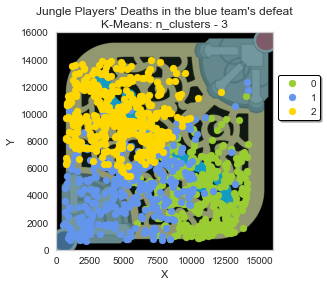

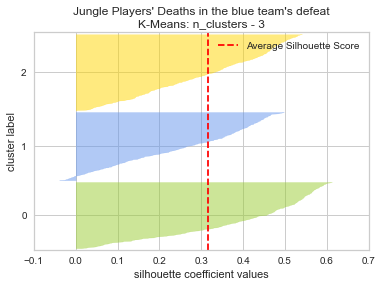

Silhouette score: 0.3167706502848467
2    448
1    402
0    390
Name: cluster, dtype: int64

Inertia: 1748.7892278992465

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10509.825641,4310.476923,11.716497
1,1,5404.358209,5202.283582,25.352320
2,2,4757.863839,9706.917411,14.592536


In [86]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "cornflowerblue", "gold"])
colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

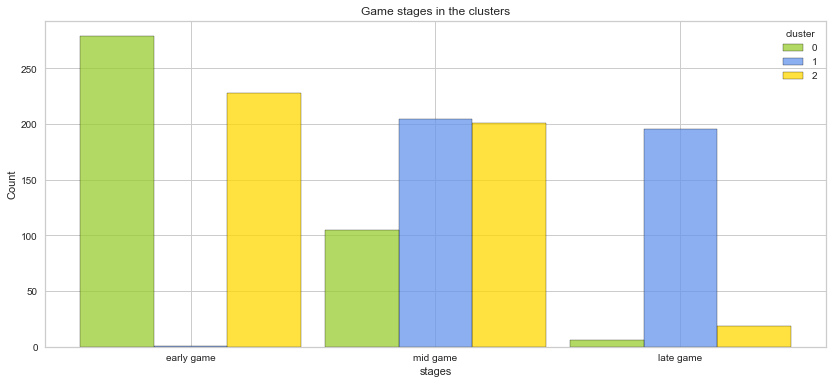

In [87]:
stagesPerClusterV2(blueSideDefeat_df, colors)

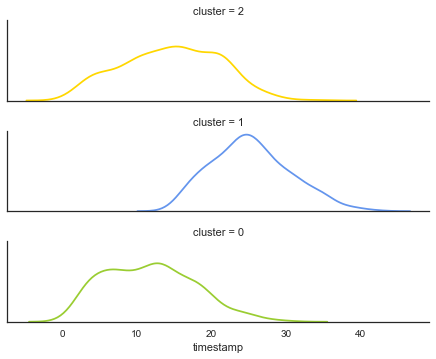

In [41]:
c = {"color": cluster_colors}

sns.set_style("whitegrid")
clusters = profiling_df.cluster.value_counts().index
sea = sns.FacetGrid(profiling_df, row = "cluster",
                    row_order = clusters,
                    height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
 
sea.map(sns.kdeplot, "timestamp")
sea.set(yticklabels=[])
sea.set(ylabel=None)
#plt.grid(False)
    
plt.show()

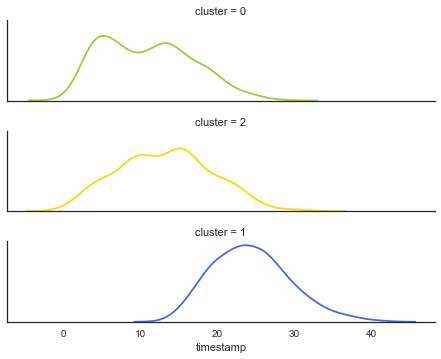

In [ ]:
c = {"color": cluster_colors}

sns.set_style("ticks")
clusters = profiling_df.cluster.value_counts().index
sea = sns.FacetGrid(profiling_df, row = "cluster",
                    row_order = clusters,
                    height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
 
sea.map(sns.kdeplot, "timestamp")
sea.set(yticklabels=[])
sea.set(ylabel=None)
#plt.grid(False)
    
plt.show()

In [58]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))

professional players played 35 champions when they won on the red side

Cluster 0 - 33 champions:
 ['Amumu' 'AurelionSol' 'Diana' 'Elise' 'Gragas' 'Graves' 'Hecarim' 'Ivern'
 'JarvanIV' 'Karthus' 'Khazix' 'Kindred' 'LeeSin' 'Lillia' 'Maokai'
 'MonkeyKing' 'Morgana' 'Nidalee' 'Nunu' 'Poppy' 'Qiyana' 'RekSai'
 'Rengar' 'Rumble' 'Sejuani' 'Sylas' 'Taliyah' 'Trundle' 'Vi' 'Viego'
 'Volibear' 'XinZhao' 'Zac']
Cluster 1 - 33 champions:
 ['Amumu' 'AurelionSol' 'Belveth' 'Diana' 'Elise' 'Gragas' 'Graves'
 'Hecarim' 'Ivern' 'JarvanIV' 'Karthus' 'Khazix' 'Kindred' 'LeeSin'
 'Lillia' 'Maokai' 'MonkeyKing' 'Morgana' 'Nidalee' 'Nunu' 'Poppy'
 'Qiyana' 'RekSai' 'Rengar' 'Rumble' 'Ryze' 'Sejuani' 'Sylas' 'Vi' 'Viego'
 'Volibear' 'XinZhao' 'Zac']
Cluster 2 - 35 champions:
 ['Amumu' 'AurelionSol' 'Belveth' 'Diana' 'Elise' 'Gragas' 'Graves'
 'Hecarim' 'Ivern' 'JarvanIV' 'Karthus' 'Khazix' 'Kindred' 'LeeSin'
 'Lillia' 'Maokai' 'MonkeyKing' 'Morgana' 'Nidalee' 'Nunu' 'Poppy'
 'Qiyana' 'RekSai' 'Rengar' 'R

In [ ]:
scatterTimestamp(blueSideDefeat_df)

K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

In [ ]:
scatterTimestamp(blueSideDefeat_df)

---

### Blue Win Rate vs Red Win Rate

In [28]:
wins_df = jungler_deaths_df[jungler_deaths_df["victory"] == True]
wins_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6038,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,5.124400,7396.0,6838.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6041,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,6.737800,10140.0,2505.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6199,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,20.334733,11330.0,10690.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6221,EUW1_6272349243,Red,anonymous 24,euw1,LeeSin,7.901383,4114.0,7822.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6226,EUW1_6272349243,Red,anonymous 24,euw1,LeeSin,10.258183,5128.0,3384.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275607,KR_6376002673,Red,anonymous 48,kr,Gragas,22.257083,6048.0,5969.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275614,KR_6376002673,Red,anonymous 48,kr,Gragas,25.482650,6742.0,4329.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275648,KR_6375973806,Red,anonymous 48,kr,Gragas,12.092683,4159.0,10322.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [29]:
wins = len(np.unique(wins_df["gameId"]))
wins

443

In [30]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 62.07674943566591 vs Blue: 37.92325056433409


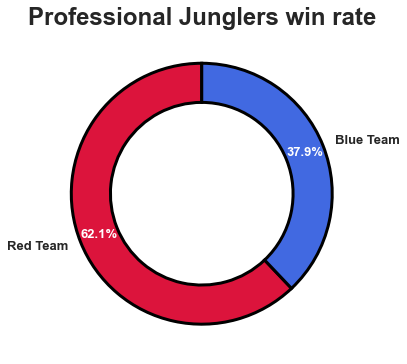

In [65]:
fig, ax = plt.subplots(figsize=(6, 6))
 
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}

_, texts, autotexts = ax.pie([r,b], 
       wedgeprops= wedgeprops, 
       startangle=90,
       labels=["Red Team", "Blue Team"],
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=['crimson', 'royalblue'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight("bold")
    autotext.set_fontsize(13)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[0].set_fontweight("bold")
texts[1].set_fontweight("bold")

plt.title('Professional Junglers win rate', fontsize=24, loc='center', fontweight="bold")

plt.show()

In [32]:
b = (blueSideVictory_df.shape[0]/ wins_df.shape[0]) * 100
r = (redSideVictory_df.shape[0]/ wins_df.shape[0]) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 63.021420518602035 vs Blue: 36.97857948139797
